# ISE || MS Interpretation 4 | Archetype Frequency across the Dataset

In [1]:
# DATA HANDLING
import pandas as pd
import numpy as np
import ast
import math
from copy import deepcopy

# IMPORTING/EXPORTING
import json
import csv

# BESPOKE
import spectra_visualiser as vis
import carboxy as cbx

# VISUALISATION
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)

# MACHINE LEARNING
from sklearn.decomposition import (PCA, NMF, LatentDirichletAllocation)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from scipy.spatial.distance import cosine

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


In [2]:
f = open('output_interpretation//ise_arr_rt_Part4.csv')
arr_rt = np.loadtxt(f, delimiter=',')

f = open('output_interpretation//ise_arr_50_Part4.csv')
arr_50 = np.loadtxt(f, delimiter=',')

f = open('output_interpretation//ise_arr_ST_Part4.csv')
arr_ST = np.loadtxt(f, delimiter=',')

In [3]:
with open('output_interpretation//ise_count_rt.txt') as f:
    count_temp = json.loads(f.read())
    
count_rt = {}
for key in count_temp:
    count_rt[float(key)] = count_temp[key]
    
with open('output_interpretation//ise_count_50.txt') as f:
    count_temp = json.loads(f.read())
    
count_50 = {}
for key in count_temp:
    count_50[float(key)] = count_temp[key]
    
with open('output_interpretation//ise_count_ST.txt') as f:
    count_temp = json.loads(f.read())
    
count_ST = {}
for key in count_temp:
    count_ST[float(key)] = count_temp[key]

In [4]:
df_rt_amf = pd.read_csv('output_interpretation//ise_df_rt.csv', index_col=0)
df_50_amf = pd.read_csv('output_interpretation//ise_df_50.csv', index_col=0)
df_ST_amf = pd.read_csv('output_interpretation//ise_df_ST.csv', index_col=0)

## Archetype Composition and Representation throughout the Dataset (from Part 2)

In [5]:
def feature_scale(x, min_x=0.0, max_x=2.6228362375479755, a=0.0, b=1.0):
    f1 = (x - min_x)*(b-a)
    f2 = (max_x - min_x)
    x_prime = a + (f1 / f2)
    return x_prime

def nmf_of_section(arr, n_components, lower_limit, upper_limit):
    #nmf = NMF(n_components=n_components, init=None).fit_transform(arr[lower_limit:upper_limit])

    model = NMF(n_components=n_components, init=None)
    W = model.fit_transform(arr[lower_limit:upper_limit])
    H = model.components_
    err = model.reconstruction_err_

    df_H = pd.DataFrame(H)
    
    return W, H, err, df_H

def pca_of_section(arr, n_components, lower_limit, upper_limit):
    model = PCA(n_components=n_components)
    X_fit = model.fit_transform(arr[lower_limit:upper_limit])
    X_comp = model.components_
    var = model.explained_variance_
    var_ratio = model.explained_variance_ratio_

    df_comp = pd.DataFrame(X_comp)

    return X_fit, X_comp, var, var_ratio, df_comp
    
def archetypes(df_H, title:str=""):
    # get max_values for 
    maxes = []
    for col in df_H.columns:
        maxes.append(max(df_H[col]))
    max_value = max(maxes)
    
def sample_composition(W, title="", cmap='binary'):
    fig,ax = plt.subplots(1,1,figsize=(10,10))
    ax.imshow(W, cmap)
    ax.set_ylabel('Experiment #', fontsize=12)
    ax.set_xlabel('MS Archetypes', fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')

    fig.tight_layout()
    fig.savefig('C://Users//group//Documents//W matrix.png')

## Rerurn By Temperature with Correct Number of Components

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


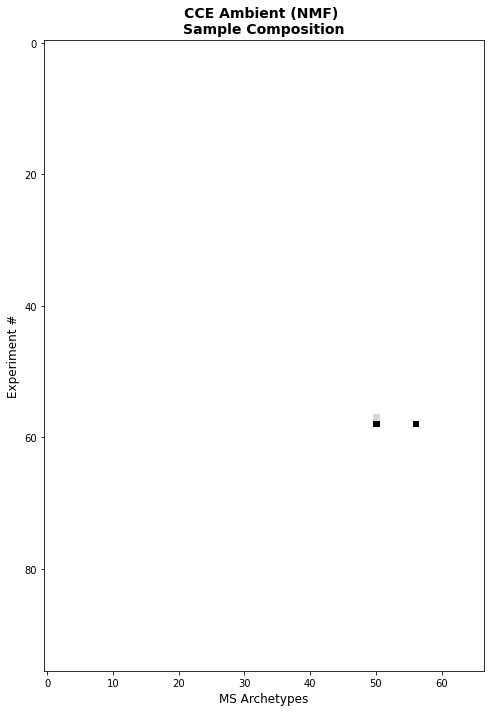

In [6]:
W_rt, H_rt, err_rt, df_H_rt = nmf_of_section(arr_rt, 67, 0, 96)
sample_composition(W_rt, 'CCE Ambient (NMF) \nSample Composition')

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


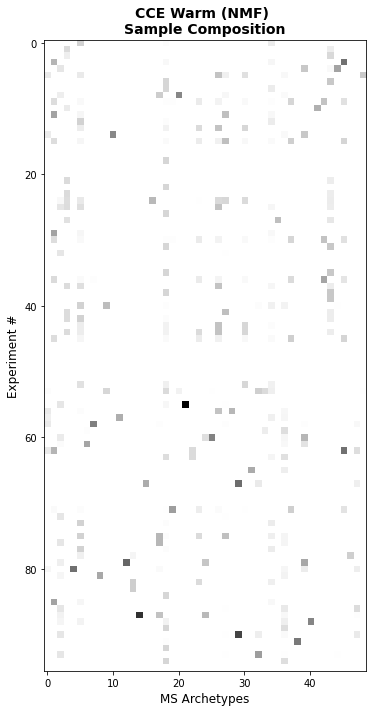

In [7]:
W_50, H_50, err_50, df_H_50 = nmf_of_section(arr_50, 49, 0, 96)
sample_composition(W_50, 'CCE Warm (NMF) \nSample Composition')

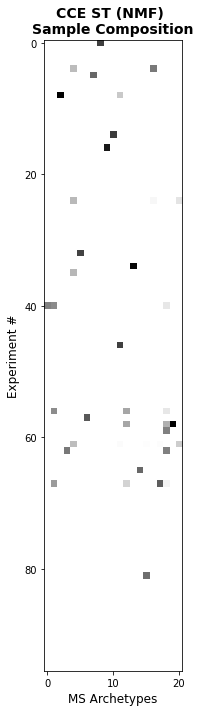

In [8]:
W_ST, H_ST, err_ST, df_H_ST = nmf_of_section(arr_ST, 21, 0, 96)
sample_composition(W_ST, 'CCE ST (NMF) \nSample Composition')

## Frequency of Each Archetype with Iteration

### Ambient Conditions

(34, 33)


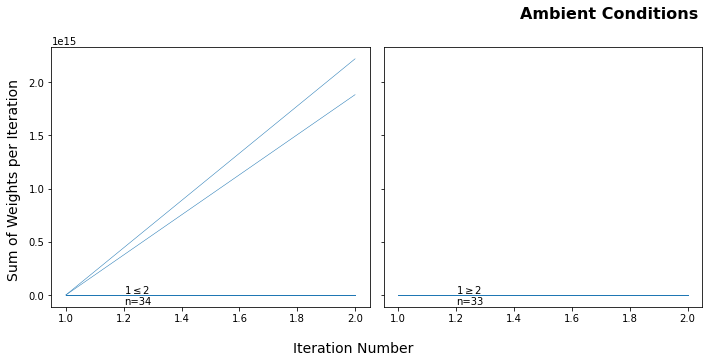

In [17]:
W = W_rt

traces = []

for i in W.T:
    trace = [
        sum(i[:48]),
        sum(i[48:96]),
    ]
    
    traces.append(trace)

len(traces)

type1 = []
type2 = []

classification_rt = []


for i in traces:
    if (i[0] <= i[1]):
        type1.append(i)
        classification_rt.append('1')
    elif (i[0] >= i[1]):
        type2.append(i)
        classification_rt.append('2')
    
        
len_rt = (len(type1), len(type2))

print(len_rt)




fig,ax = plt.subplots(1,2, figsize=(10,5), sharey=True, sharex=True)

ax[0].annotate(('1$\leq$2\nn='+str(len(type1))), va='center', xy=(1.2,5.7), xycoords='data')
ax[1].annotate(('1$\geq$2 \nn='+str(len(type2))), va='center', xy=(1.2,5.7), xycoords='data')


plot_color='tab:blue'

for i in type1:
    ax[0].plot([1,2], i, linewidth=0.5, color=plot_color)
for i in type2:
    ax[1].plot([1,2], i, linewidth=0.5, color=plot_color)

    
fig.supylabel('Sum of Weights per Iteration', fontsize=14)
fig.supxlabel('Iteration Number', fontsize=14)
fig.suptitle('Ambient Conditions', fontsize=16, fontweight='bold', x=0.98, ha='right')
fig.tight_layout()

In [18]:
all_origins = []
for item in [
    type1, type2
]:
    origin = []
    for i in item:
        if i[0] == 0 and i[1] > 0:
            origin.append(2)
        elif i[0] > 0:
            origin.append(1)
    all_origins.append(origin)

count_rt1, count_rt2 = 0, 0
    
for i in all_origins:
    for j in i:
        if j == 1:
            count_rt1 += 1
        if j == 2:
            count_rt2 +=1
        
print(count_rt1, count_rt2)

54 13


### Warm Conditions

(28, 21)


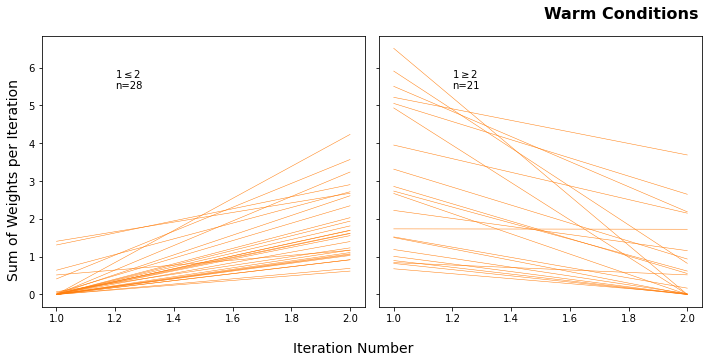

In [19]:
W = W_50

traces = []

for i in W.T:
    trace = [
        sum(i[:48]),
        sum(i[48:96]),
    ]
    
    traces.append(trace)

len(traces)

type1 = []
type2 = []

classification_50 = []


for i in traces:
    if (i[0] <= i[1]):
        type1.append(i)
        classification_50.append('1')
    elif (i[0] >= i[1]):
        type2.append(i)
        classification_50.append('2')
    
        
len_50 = (len(type1), len(type2))

print(len_50)




fig,ax = plt.subplots(1,2, figsize=(10,5), sharey=True, sharex=True)

ax[0].annotate(('1$\leq$2\nn='+str(len(type1))), va='center', xy=(1.2,5.7), xycoords='data')
ax[1].annotate(('1$\geq$2 \nn='+str(len(type2))), va='center', xy=(1.2,5.7), xycoords='data')


plot_color='tab:orange'

for i in type1:
    ax[0].plot([1,2], i, linewidth=0.5, color=plot_color)
for i in type2:
    ax[1].plot([1,2], i, linewidth=0.5, color=plot_color)

    
fig.supylabel('Sum of Weights per Iteration', fontsize=14)
fig.supxlabel('Iteration Number', fontsize=14)
fig.suptitle('Warm Conditions', fontsize=16, fontweight='bold', x=0.98, ha='right')
fig.tight_layout()

In [20]:
all_origins = []
for item in [
    type1, type2
]:
    origin = []
    for i in item:
        if i[0] == 0 and i[1] > 0:
            origin.append(2)
        elif i[0] > 0:
            origin.append(1)
    all_origins.append(origin)

count_501, count_502 = 0, 0
    
for i in all_origins:
    for j in i:
        if j == 1:
            count_501 += 1
        if j == 2:
            count_502 +=1
        
print(count_501, count_502)

42 7


### Solvothermal Conditions

(10, 11)


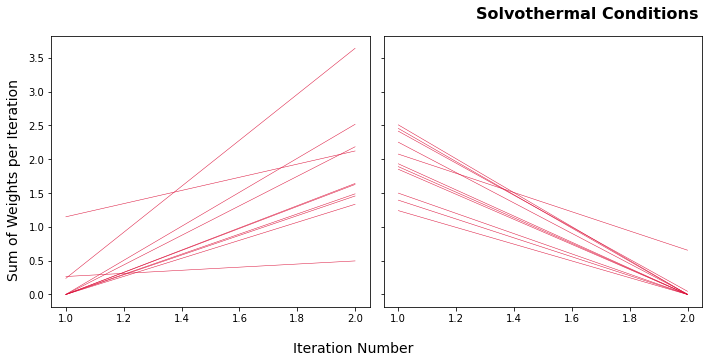

In [21]:
W = W_ST

traces = []

for i in W.T:
    trace = [
        sum(i[:48]),
        sum(i[48:96]),
    ]
    
    traces.append(trace)

len(traces)

type1 = []
type2 = []

classification_ST = []


for i in traces:
    if (i[0] <= i[1]):
        type1.append(i)
        classification_ST.append('1')
    elif (i[0] >= i[1]):
        type2.append(i)
        classification_ST.append('2')
    
        
len_ST = (len(type1), len(type2))

print(len_ST)




fig,ax = plt.subplots(1,2, figsize=(10,5), sharey=True, sharex=True)

ax[0].annotate(('1$\leq$2\nn='+str(len(type1))), va='center', xy=(1.2,5.7), xycoords='data')
ax[1].annotate(('1$\geq$2 \nn='+str(len(type2))), va='center', xy=(1.2,5.7), xycoords='data')


plot_color='crimson'

for i in type1:
    ax[0].plot([1,2], i, linewidth=0.5, color=plot_color)
for i in type2:
    ax[1].plot([1,2], i, linewidth=0.5, color=plot_color)

    
fig.supylabel('Sum of Weights per Iteration', fontsize=14)
fig.supxlabel('Iteration Number', fontsize=14)
fig.suptitle('Solvothermal Conditions', fontsize=16, fontweight='bold', x=0.98, ha='right')
fig.tight_layout()

In [22]:
all_origins = []
for item in [
    type1, type2
]:
    origin = []
    for i in item:
        if i[0] == 0 and i[1] > 0:
            origin.append(2)
        elif i[0] > 0:
            origin.append(1)
    all_origins.append(origin)

count_ST1, count_ST2 = 0, 0
    
for i in all_origins:
    for j in i:
        if j == 1:
            count_ST1 += 1
        if j == 2:
            count_ST2 +=1
        
print(count_ST1, count_ST2)

20 1


## Archetype Origins

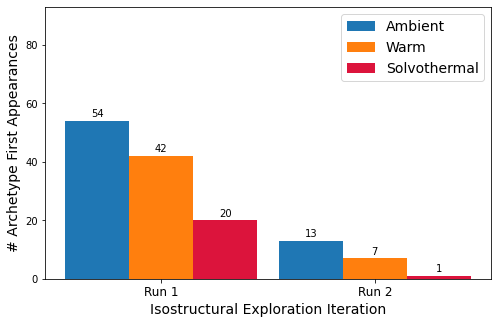

In [23]:
fig, ax = plt.subplots(figsize=(8,5))

width = 0.3

ax.set_ylim(0,93)

r1 = [1,2]
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

bars_rt = ax.bar(r1,[count_rt1,count_rt2], color='tab:blue', width=width, label='Ambient')
bars_50 = ax.bar(r2,[count_501,count_502], color='tab:orange', width=width, label='Warm')
bars_ST = ax.bar(r3,[count_ST1,count_ST2], color='crimson', width=width, label='Solvothermal')

ax.legend(fontsize=14)

ax.set_xticks(r2)
ax.set_xticklabels(['Run 1','Run 2'], fontsize=12)
ax.set_xlabel('Isostructural Exploration Iteration', fontsize=14)
ax.set_ylabel('# Archetype First Appearances', fontsize=14)

ax.bar_label(bars_rt, padding=2)
ax.bar_label(bars_50, padding=2)
ax.bar_label(bars_ST, padding=2)

fig.savefig('C:\\Users\\group\\Documents\\ISE_Archetype Origins.png')

## Archetype Origin and Max Iterations

In [24]:
W = W_rt

traces = []

for i in W.T:
    trace = [
        sum(i[:48]),
        sum(i[48:96]),
    ]
    
    traces.append(trace)

len(traces)


count_rt_ = []
max_rt = []

for i in traces:
    if i[0] > 0:
        count_rt_.append(1)
    elif i[0] == 0 and i[1] > 0:
        count_rt_.append(2)
        
    if i[0] == max(i):
        max_rt.append(1)
    if i[1] == max(i):
        max_rt.append(2)
        
        
print(
    'Freq Origins w/increasing iteration:',
    count_rt_.count(1),count_rt_.count(2)
)

print(
    'Freq Max w/increasing iteration:',
    max_rt.count(1),max_rt.count(2)
)

#df_rt = deepcopy(sum_sim_rt)
#df_rt.columns = ['Sum Cosine']

df_rt = pd.DataFrame(count_rt_)
df_rt.columns = ['Origin']
#df_rt['Origin'] = count_rt_
df_rt['Max'] = max_rt
df_rt['PlotOrigin'] = [x-0.2 for x in count_rt_]
df_rt['PlotMax'] = [x-0.2 for x in max_rt]

df_rt

Freq Origins w/increasing iteration: 54 13
Freq Max w/increasing iteration: 33 34


,Origin,Max,PlotOrigin,PlotMax
0,1,2,0.8,1.8
1,1,2,0.8,1.8
2,1,2,0.8,1.8
3,1,2,0.8,1.8
4,1,1,0.8,0.8
...,...,...,...,...
62,1,2,0.8,1.8
63,2,2,1.8,1.8
64,1,2,0.8,1.8
65,1,1,0.8,0.8


In [25]:
W = W_50

traces = []

for i in W.T:
    trace = [
        sum(i[:48]),
        sum(i[48:96]),
    ]
    
    traces.append(trace)

len(traces)


count_50_ = []
max_50 = []

for i in traces:
    if i[0] > 0:
        count_50_.append(1)
    elif i[0] == 0 and i[1] > 0:
        count_50_.append(2)
        
    if i[0] == max(i):
        max_50.append(1)
    if i[1] == max(i):
        max_50.append(2)
        
        
print(
    'Freq Origins w/increasing iteration:',
    count_50_.count(1),count_50_.count(2)
)

print(
    'Freq Max w/increasing iteration:',
    max_50.count(1),max_50.count(2)
)

#df_50 = deepcopy(sum_sim_50)
#df_50.columns = ['Sum Cosine']

df_50 = pd.DataFrame(count_50_)
df_50.columns = ['Origin']
#df_50['Origin'] = count_50_
df_50['Max'] = max_50
df_50['PlotOrigin'] = [x for x in count_50_]
df_50['PlotMax'] = [x for x in max_50]

df_50

Freq Origins w/increasing iteration: 42 7
Freq Max w/increasing iteration: 21 28


,Origin,Max,PlotOrigin,PlotMax
0,1,2,1,2
1,1,1,1,1
2,1,2,1,2
3,1,1,1,1
4,1,2,1,2
5,1,1,1,1
6,2,2,2,2
7,1,2,1,2
8,2,2,2,2
9,1,1,1,1


In [26]:
W = W_ST

traces = []

for i in W.T:
    trace = [
        sum(i[:48]),
        sum(i[48:96]),
    ]
    
    traces.append(trace)

len(traces)


count_ST_ = []
max_ST = []

for i in traces:
    if i[0] > 0:
        count_ST_.append(1)
    elif i[0] == 0 and i[1] > 0:
        count_ST_.append(2)
        
    if i[0] == max(i):
        max_ST.append(1)
    if i[1] == max(i):
        max_ST.append(2)

        
print(
    'Freq Origins w/increasing iteration:',
    count_ST_.count(1),count_ST_.count(2),count_ST_.count(3),count_ST_.count(4)
)

print(
    'Freq Max w/increasing iteration:',
    max_ST.count(1),max_ST.count(2),max_ST.count(3),max_ST.count(4)
)

#df_ST = deepcopy(sum_sim_ST)
#df_ST.columns = ['Sum Cosine']

df_ST = pd.DataFrame(count_ST_)
df_ST.columns = ['Origin']
#df_ST['Origin'] = count_ST_
df_ST['Max'] = max_ST
df_ST['PlotOrigin'] = [x+0.2 for x in count_ST_]
df_ST['PlotMax'] = [x+0.2 for x in max_ST]

df_ST

Freq Origins w/increasing iteration: 20 1 0 0
Freq Max w/increasing iteration: 11 10 0 0


,Origin,Max,PlotOrigin,PlotMax
0,1,1,1.2,1.2
1,1,2,1.2,2.2
2,1,1,1.2,1.2
3,1,2,1.2,2.2
4,1,1,1.2,1.2
5,1,1,1.2,1.2
6,2,2,2.2,2.2
7,1,1,1.2,1.2
8,1,1,1.2,1.2
9,1,1,1.2,1.2


In [35]:
for df in [df_rt,df_50,df_ST]:
    optimised = []

    for index, row in df.iterrows():
        if row['Origin'] == 1 and (row['Max'] == 2):
            optimised.append('yes')
        elif row['Origin'] == 2 and (row['Max'] == 2):
            optimised.append('meh')
        else:
            optimised.append('no')

    df['Optimised?'] = optimised

display(df_rt)
display(df_50)
display(df_ST)

,Origin,Max,PlotOrigin,PlotMax,Optimised?
0,1,2,0.8,1.8,yes
1,1,2,0.8,1.8,yes
2,1,2,0.8,1.8,yes
3,1,2,0.8,1.8,yes
4,1,1,0.8,0.8,no
...,...,...,...,...,...
62,1,2,0.8,1.8,yes
63,2,2,1.8,1.8,meh
64,1,2,0.8,1.8,yes
65,1,1,0.8,0.8,no


,Origin,Max,PlotOrigin,PlotMax,Optimised?
0,1,2,1,2,yes
1,1,1,1,1,no
2,1,2,1,2,yes
3,1,1,1,1,no
4,1,2,1,2,yes
5,1,1,1,1,no
6,2,2,2,2,meh
7,1,2,1,2,yes
8,2,2,2,2,meh
9,1,1,1,1,no


,Origin,Max,PlotOrigin,PlotMax,Optimised?
0,1,1,1.2,1.2,no
1,1,2,1.2,2.2,yes
2,1,1,1.2,1.2,no
3,1,2,1.2,2.2,yes
4,1,1,1.2,1.2,no
5,1,1,1.2,1.2,no
6,2,2,2.2,2.2,meh
7,1,1,1.2,1.2,no
8,1,1,1.2,1.2,no
9,1,1,1.2,1.2,no


In [30]:
print(
    df_rt['Optimised?'].value_counts(), '\n',
    df_50['Optimised?'].value_counts(), '\n',
    df_ST['Optimised?'].value_counts(),
)

no     46
yes    21
Name: Optimised?, dtype: int64 
 no     28
yes    21
Name: Optimised?, dtype: int64 
 no     12
yes     9
Name: Optimised?, dtype: int64


Text(0.5, 1.0, 'Solvothermal Run 1 (20)')

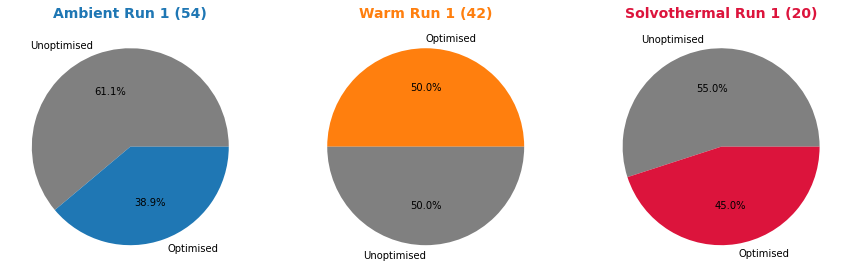

In [31]:
df_rt_1 = df_rt[df_rt['Origin'] == 1]
df_rt_2 = df_rt[df_rt['Origin'] == 2]


fig,ax = plt.subplots(1,3, figsize=(15,5))

ax[0].pie(
    df_rt_1['Optimised?'].value_counts(), 
    labels=['Unoptimised','Optimised'], 
    colors=['grey','tab:blue'],
    autopct='%1.1f%%'
)

n_1 = str(len(df_rt_1))
ax[0].set_title('Ambient Run 1 ('+n_1+')', color='tab:blue', fontsize=14, fontweight='bold')



df_50_1 = df_50[df_50['Origin'] == 1]
df_50_2 = df_50[df_50['Origin'] == 2]

plot_color='tab:orange'

ax[1].pie(
    df_50_1['Optimised?'].value_counts(), 
    labels=['Optimised','Unoptimised'], 
    colors=[plot_color,'grey'],
    autopct='%1.1f%%'
)

n_1 = str(len(df_50_1))
ax[1].set_title('Warm Run 1 ('+n_1+')', color=plot_color, fontsize=14, fontweight='bold')




df_ST_1 = df_ST[df_ST['Origin'] == 1]
df_ST_2 = df_ST[df_ST['Origin'] == 2]

plot_color='crimson'

ax[2].pie(
    df_ST_1['Optimised?'].value_counts(), 
    labels=['Unoptimised','Optimised'], 
    colors=['grey',plot_color],
    autopct='%1.1f%%'
)

n_1 = str(len(df_ST_1))
ax[2].set_title('Solvothermal Run 1 ('+n_1+')', color=plot_color, fontsize=14, fontweight='bold')

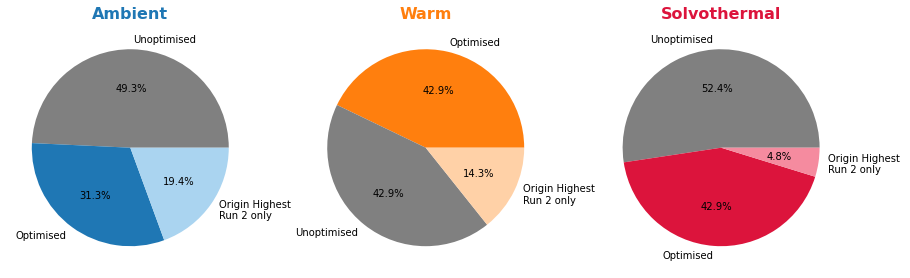

In [38]:
fig,ax = plt.subplots(1,3, figsize=(15,5))

ax[0].pie(
    df_rt['Optimised?'].value_counts(), 
    labels=['Unoptimised','Optimised','Origin Highest \nRun 2 only'], 
    colors=['grey','tab:blue','#AAD4F0'],
    autopct='%1.1f%%'
)

ax[0].set_title('Ambient', color='tab:blue', fontsize=16, fontweight='bold')


ax[1].pie(
    df_50['Optimised?'].value_counts(), 
    labels=['Optimised','Unoptimised','Origin Highest \nRun 2 only'], 
    colors=['tab:orange','grey','#FFD1A7'],
    autopct='%1.1f%%'
)

ax[1].set_title('Warm', color='tab:orange', fontsize=16, fontweight='bold')


ax[2].pie(
    df_ST['Optimised?'].value_counts(), 
    labels=['Unoptimised','Optimised','Origin Highest \nRun 2 only'], 
    colors=['grey','crimson','#F58B9F'],
    autopct='%1.1f%%',
)

ax[2].set_title('Solvothermal', color='crimson', fontsize=16, fontweight='bold')



fig.savefig('output_interpretation//Pies_ISE_All.png')